In [2]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 40.1 MB/s eta 0:00:00


In [8]:
import numpy as np

In [4]:
import pennylane as qml
import matplotlib.pyplot as plt

In [5]:
def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

In [6]:
def multiplication(wires_m, wires_k, wires_solution):
    # prepare sol-qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_k)):
        for j in range(len(wires_m)):
            coeff = 2 ** (len(wires_m) + len(wires_k) - i - j - 2)
            qml.ctrl(add_k_fourier, control=[wires_k[i], wires_m[j]])(coeff, wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)

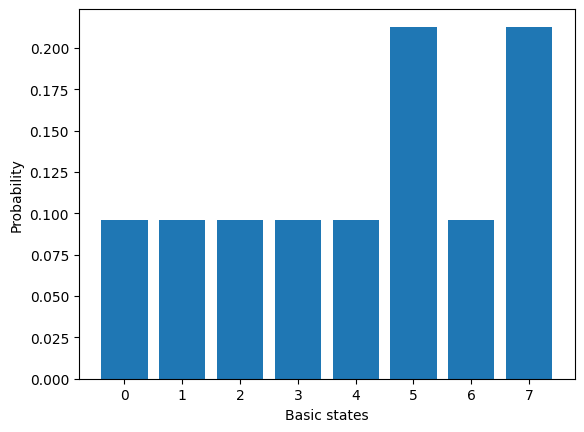

In [11]:
n = 35 # number we want to factor

wires_m = [0, 1, 2]                 # qubits needed to encode m
wires_k = [3, 4, 5]                 # qubits needed to encode k
wires_solution = [6, 7, 8, 9, 10,11]   # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution)

n_wires = len(dev.wires)

@qml.qnode(dev)
def factorization(n, wires_m, wires_k, wires_solution):
    # Superposition of the input
    for wire in wires_m:
        qml.Hadamard(wires=wire)

    for wire in wires_k:
        qml.Hadamard(wires=wire)

    # Apply the multiplication
    multiplication(wires_m, wires_k, wires_solution)

    # Change sign of n
    qml.FlipSign(n, wires=wires_solution)

    # Uncompute multiplication
    qml.adjoint(multiplication)(wires_m, wires_k, wires_solution)

    # Apply Grover operator
    qml.GroverOperator(wires=wires_m + wires_k)

    return qml.probs(wires=wires_m)


plt.bar(range(2 ** len(wires_m)), factorization(n, wires_m, wires_k, wires_solution))
plt.xlabel("Basic states")
plt.ylabel("Probability")
plt.show()

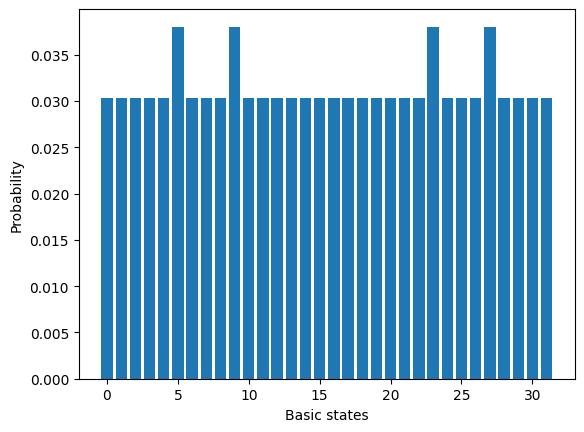

In [16]:
n = 115 # number we want to factor

wires_m = [0, 1,2,3,4]                 # qubits needed to encode m
wires_k = [5,6,7,8,9]                 # qubits needed to encode k
wires_solution = [10,11,12,13,14,15,16]   # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution)

n_wires = len(dev.wires)

@qml.qnode(dev)
def factorization(n, wires_m, wires_k, wires_solution):
    # Superposition of the input
    for wire in wires_m:
        qml.Hadamard(wires=wire)

    for wire in wires_k:
        qml.Hadamard(wires=wire)

    # Apply the multiplication
    multiplication(wires_m, wires_k, wires_solution)

    # Change sign of n
    qml.FlipSign(n, wires=wires_solution)

    # Uncompute multiplication
    qml.adjoint(multiplication)(wires_m, wires_k, wires_solution)

    # Apply Grover operator
    qml.GroverOperator(wires=wires_m + wires_k)

    return qml.probs(wires=wires_m)


plt.bar(range(2 ** len(wires_m)), factorization(n, wires_m, wires_k, wires_solution))
plt.xlabel("Basic states")
plt.ylabel("Probability")
plt.show()